<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Build/blob/master/DS-Unit-1-Build/LS_DS10_1_Build_Sprint_LasVegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
import sys
import pandas as pd
sys.path.append('/content/')
lv=pd.read_csv('http://marso.space/LasVegas.csv')

In [0]:
lv.head(1)

,tlv_Year,tlv_Quarter,from_cities,to_Las_Vegas,tlv_miles,tlv_passengers,tlv_fare,tlv_fare_lg,tlv_fare_low,flv_Year,flv_Quarter,from_LasVegas,to_Cities,flv_miles,flv_passengers,flv_fare_,flv_fare_lg,flv_fare_low,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,2018.0,1.0,"Albuquerque, NM","Las Vegas, NV",486.0,459.0,154.0,158.0,80.0,2018,1,"Las Vegas, NV","Los Angeles, CA",236,6089,129,138,90,NaN,NaN,NaN,NaN


In [0]:
sum_tlv = lv.groupby(['tlv_Quarter', 'to_Las_Vegas']).agg({'tlv_passengers': 'sum', 'tlv_miles': 'sum','tlv_fare_lg':'sum','tlv_fare_low':'sum'}).plot(ax=ax)

This is a groupby plot of Passangers against miles traveled.

In [0]:
sum_tlv = lv.groupby(['tlv_Quarter', 'to_Las_Vegas']).agg({'tlv_passengers': 'sum', 'tlv_miles': 'sum','tlv_fare_lg':'sum','tlv_fare_low':'sum'})
sum_tlv

,,tlv_passengers,tlv_miles,tlv_fare_lg,tlv_fare_low
tlv_Quarter,to_Las_Vegas,,,,
1.0,"Las Vegas, NV",23155.0,34470.0,5106.0,3032.0
2.0,"Las Vegas, NV",26286.0,33265.0,4638.0,2812.0
3.0,"Las Vegas, NV",24995.0,33265.0,4561.0,2693.0
4.0,"Las Vegas, NV",24207.0,33265.0,4805.0,2775.0


<Figure size 432x288 with 0 Axes>

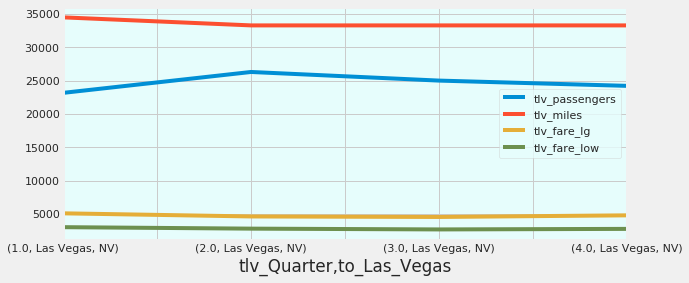

In [0]:
plt.style.use('fivethirtyeight')
#generate the figure
fig = plt.figure()
fig.patch.set_facecolor('xkcd:pale blue')
#facecolor=fig.get_facecolor()
fig.patch.set(facecolor='pink')
# generate the axes (center section) for the plot
plt.rcParams['axes.facecolor']='#E6FDFC'
fig, ax = plt.subplots(figsize=(9,4))
sum_tlv = lv.groupby(['tlv_Quarter','to_Las_Vegas']).agg({'tlv_passengers': 'sum', 'tlv_miles': 'sum','tlv_fare_lg':'sum','tlv_fare_low':'sum'}).plot(ax=ax)

In [0]:
sum_flv = lv.groupby(['flv_Quarter', 'to_Las_Vegas']).agg({'flv_passengers': 'sum', 'flv_miles': 'sum','flv_fare_lg':'sum','flv_fare_low':'sum'})
sum_flv

,,flv_passengers,flv_miles,flv_fare_lg,flv_fare_low
flv_Quarter,to_Las_Vegas,,,,
1,"Las Vegas, NV",30934,34258,5135,3123
2,"Las Vegas, NV",33078,30718,4599,2825
3,"Las Vegas, NV",30230,30460,4358,2503
4,"Las Vegas, NV",29443,32546,4634,2790


In [0]:
sum_flv = lv.groupby(['flv_Quarter','from_LasVegas']).agg({'flv_passengers': 'sum', 'flv_miles': 'sum', 'flv_fare_lg':'sum','flv_fare_low':'sum'})
sum_flv

,,flv_passengers,flv_miles,flv_fare_lg,flv_fare_low
flv_Quarter,from_LasVegas,,,,
1,"Las Vegas, NV",45664,45695,6969,4510
2,"Las Vegas, NV",49308,41051,6325,4095
3,"Las Vegas, NV",47529,41051,6171,3712
4,"Las Vegas, NV",45809,43138,6532,3989


<Figure size 432x288 with 0 Axes>

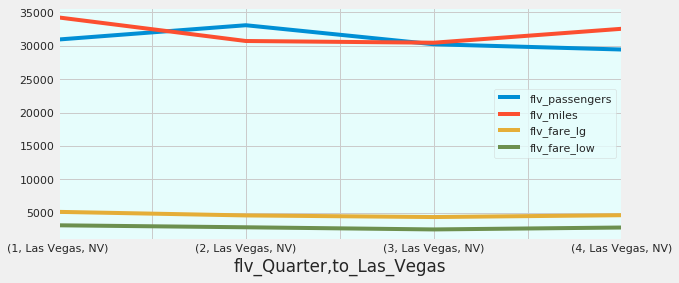

In [0]:
plt.style.use('fivethirtyeight')
#generate the figure
fig = plt.figure()
fig.patch.set_facecolor('xkcd:pale blue')
#facecolor=fig.get_facecolor()
fig.patch.set(facecolor='pink')
# generate the axes (center section) for the plot
plt.rcParams['axes.facecolor']='#E6FDFC'

fig, ax = plt.subplots(figsize=(9,4))

sum_flv = lv.groupby(['flv_Quarter','to_Las_Vegas']).agg({'flv_passengers': 'sum', 'flv_miles': 'sum','flv_fare_lg':'sum','flv_fare_low':'sum'}).plot(ax=ax)

In case one has not noticed, There are more people flying out of Las Vegas, than flying into Las Vegas.

Here we have two columns with 

In [0]:
lv.head(4)

,tlv_Year,tlv_Quarter,from_cities,to_Las_Vegas,tlv_miles,tlv_passengers,tlv_fare,tlv_fare_lg,tlv_fare_low,flv_Year,flv_Quarter,from_LasVegas,to_Cities,flv_miles,flv_passengers,flv_fare_,flv_fare_lg,flv_fare_low,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,2018.0,1.0,"Albuquerque, NM","Las Vegas, NV",486.0,459.0,154.0,158.0,80.0,2018,1,"Las Vegas, NV","Los Angeles, CA",236,6089,129,138,90,NaN,NaN,NaN,NaN
1,2018.0,2.0,"Albuquerque, NM","Las Vegas, NV",486.0,493.0,158.0,161.0,83.0,2018,2,"Las Vegas, NV","Los Angeles, CA",236,6810,126,143,93,NaN,NaN,NaN,NaN
2,2018.0,3.0,"Albuquerque, NM","Las Vegas, NV",486.0,462.0,158.0,163.0,77.0,2018,3,"Las Vegas, NV","Los Angeles, CA",236,7014,121,139,94,NaN,NaN,NaN,NaN
3,2018.0,4.0,"Albuquerque, NM","Las Vegas, NV",486.0,499.0,160.0,165.0,74.0,2018,4,"Las Vegas, NV","Los Angeles, CA",236,6440,124,136,114,NaN,NaN,NaN,NaN


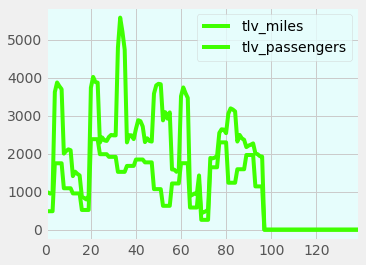

In [0]:
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
lv.loc[:,['tlv_miles','tlv_passengers']].plot.line(stacked=True, color='#3FFF00', figsize=(5,4));

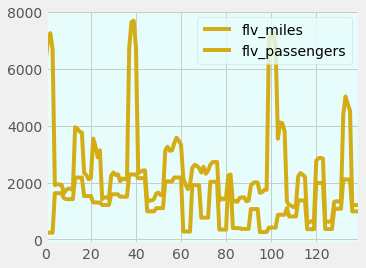

In [0]:
lv.loc[:,['flv_miles','flv_passengers']].plot.line(stacked=True, color='#D4AD16', figsize=(5,4));

In [0]:
sb=lv

This 

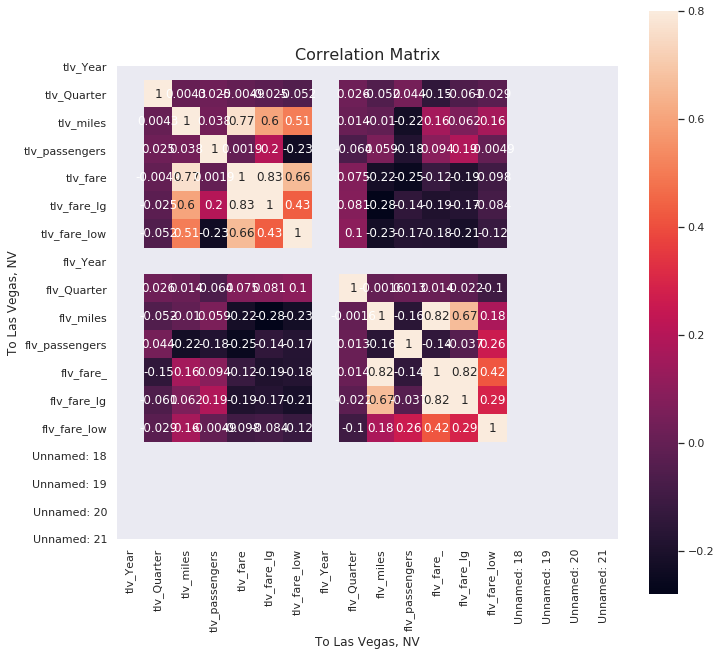

In [0]:
import seaborn as sns
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

correlation_matrix = sb.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.title('Correlation Matrix', fontsize=16);
plt.xlabel('To Las Vegas, NV')
plt.ylabel('To Las Vegas, NV')
plt.show()

In [0]:
sb.head(8)

,tlv_Year,tlv_Quarter,from_cities,to_Las_Vegas,tlv_miles,tlv_passengers,tlv_fare,tlv_fare_lg,tlv_fare_low,flv_Year,flv_Quarter,from_LasVegas,to_Cities,flv_miles,flv_passengers,flv_fare_,flv_fare_lg,flv_fare_low,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,2018.0,1.0,"Albuquerque, NM","Las Vegas, NV",486.0,459.0,154.0,158.0,80.0,2018,1,"Las Vegas, NV","Los Angeles, CA",236,6089,129,138,90,NaN,NaN,NaN,NaN
1,2018.0,2.0,"Albuquerque, NM","Las Vegas, NV",486.0,493.0,158.0,161.0,83.0,2018,2,"Las Vegas, NV","Los Angeles, CA",236,6810,126,143,93,NaN,NaN,NaN,NaN
2,2018.0,3.0,"Albuquerque, NM","Las Vegas, NV",486.0,462.0,158.0,163.0,77.0,2018,3,"Las Vegas, NV","Los Angeles, CA",236,7014,121,139,94,NaN,NaN,NaN,NaN
3,2018.0,4.0,"Albuquerque, NM","Las Vegas, NV",486.0,499.0,160.0,165.0,74.0,2018,4,"Las Vegas, NV","Los Angeles, CA",236,6440,124,136,114,NaN,NaN,NaN,NaN
4,2018.0,1.0,"Atlanta, GA","Las Vegas, NV",1747.0,1874.0,229.0,303.0,104.0,2018,1,"Las Vegas, NV","Louisville, KY",1624,284,198,204,94,NaN,NaN,NaN,NaN
5,2018.0,2.0,"Atlanta, GA","Las Vegas, NV",1747.0,2125.0,224.0,296.0,110.0,2018,2,"Las Vegas, NV","Louisville, KY",1624,317,202,212,96,NaN,NaN,NaN,NaN
6,2018.0,3.0,"Atlanta, GA","Las Vegas, NV",1747.0,2028.0,213.0,282.0,98.0,2018,3,"Las Vegas, NV","Louisville, KY",1624,303,194,210,96,NaN,NaN,NaN,NaN
7,2018.0,4.0,"Atlanta, GA","Las Vegas, NV",1747.0,1949.0,232.0,315.0,92.0,2018,4,"Las Vegas, NV","Louisville, KY",1624,295,204,210,100,NaN,NaN,NaN,NaN
